# A Single-Qubit Bell Violation as a Device-Independent Test

This notebook describe the quantum violation of a novel bell inequality bounding classical communication systems. The Bell violation does not require entanglement and is achieved by incompatible measurements and qubit superposition alone.

Generally, a Bell violation describes non-classical measurement statistics which can only be achieved by a quantum system. That is, Alice and Bob cannot violate a Bell inequality using a classical system and shared randomness. The quantum-classical separation allows for a strong device independent test to be setup provided the following assumptions hold:

### Test Assumptions:

1. Alice and Bob receive independent input drawn from uniform random distributions.
2. Alice sends Bob no more than 1-bit or 1-qubit.

If the assumptions are met, a single-qubit bell violation is sufficient to classify the bipartite communication system as a quantum communication system capable of superposition and incompatible measurements.

In an ideal implementation where the communication channel is proven to be limited, Alice and Bob do not need to be trusted. If it is not possible to verify the channel capacity, then Alice or Bob must be trusted for the test to work. 

### Note: Supporting Software
The following Bell inequality and quantum violation were found using the open-source julia package, [BellScenario.jl](https://github.com/ChitambarLab/BellScenario.jl). This package is currently in an alpha version and is unfortunately experiencing a bug which prevents proper execution within a Jupyter notebook. The result is reported in the following cells.

## Test Setting

We consider a single-qubit scenario where Alice and Bob each have a black-box with classical inputs and outputs. Alice is given an input, $x\in\{0,1,2,3\}$ and encodes the value in a qubit, $\rho_x$. The qubit is sent to Bob via some communication channel. Bob receives the qubit and performs a projective measurement based on the input $y\in\{0,1\}$. The outcome of the measurement, $b\in\{0,1\}$ is output by Bob.

<img src="img/qubit_bell_violation.png" alt="Drawing" style="width: 400px;"/>

This black-box scenario is characterized in a device-independent way by considering its set of conditional probabilities $\{p(b|xy)\}$. The conditional probability distribution or behavior of a black-box device can be considered as a vector $\vec{p}$ where each element corresponds to a different probability $p(b|xy)$.



## The Classical Bound

The classical set of probabilities $\mathcal{C}$ is the convex hull of the deterministic black-box behaviors, $\mathcal{C} = \text{conv}(\vec{p}_D)$. A behavior is deterministic if $p(b|xy)\in \{0,1\}$ for all $b$, $x$, and $y$. The deterministic behaviors of a black-box scenario are finite and therefore describe a convex polytope.

A Bell inequality is a linear inequality that bounds the classical polytope for a black-box scenario. Given the inputs, outputs, and communication between Alice and Bob, the bell inequalities can be computed. The procedure is to first enumerate the deterministic behaviors, then use a polytope transformation algorithm to find the bounding inequalities. The vertices and facets used for this result are computed using the [BellScenario.jl](https://github.com/ChitambarLab/BellScenario.jl) julia package.

A significant Bell inequality for which there is a quantum violation is expressed,

$$
6 \geq \Big(p(0|00) + p(1|10) + p(0|20) + p(1|30)\Big) + \Big(p(1|01) + p(0|11) + p(0|21) + p(1|31)\Big).
$$

This inequality may be daunting, but it can be broken down by Bob's input $y=0$ (left) and $y=1$ (right). It is important to reiterate that Alice and Bob do not know each other's input. Alice's Best strategy is to use an encoding such as $0,2 \rightarrow |0\rangle$ and $1,3 \rightarrow |1\rangle$, while Bob performs and identity decoding for $y=0$ and an inverted decoding for $y=1$. Explicitly, the identity decoder is $\{|0\rangle\langle0|,|1\rangle\langle1|\}$ and the inverting decoder is $\{|0\rangle\langle1|,|1\rangle\langle0| \}$. However, a closer look at the bell inequality reveals that when $y=1$, a violation would require Bob to be able to invert only the received but only when Alice has input $x\in\{0,1\}$. Bob does not know Alice's inputs, so there is no way for Bob to condition a decoding strategy on Alice's input. As a result, classical communication limited systems cannot violate the bell inequality.

In the case where Alice is able to share the input $x$ with Bob, a conditional decoding strategy could be applied and a violation would occur. This edge case is precisely why the communication channel must be proven to limited to to a single bit or qubit of information.

## Quantum Violation

Quantum mechanics can violate the discussed Bell inequality using the following protocol. This protocol was computed using the [BellScenario.jl](https://github.com/ChitambarLab/BellScenario.jl) julia package to optimize the quantum violation using semi-definite programming. 

Alice encodes the input $x$ into a BB84 qubit state $|\psi_x\rangle$ where $|\psi_0\rangle = |0\rangle$, $|\psi_1\rangle =|1\rangle$, $|\psi_2\rangle = |+\rangle$, $|\psi_3\rangle = |-\rangle$. Bob measures with a projective measurement onto a basis rotated off the BB84 states by an angle $\theta=\pi/4$. The measurement bases for each input $y$ are expressed

$$
\begin{align}
    &|\Pi_0^{y=0}\rangle = \cos(\pi/8)|0\rangle + \sin(\pi/8)|1\rangle, \quad |\Pi_1^{y=0}\rangle = \sin(\pi/8)|0\rangle - \cos(\pi/8)|1\rangle \\
    &|\Pi_0^{y=1}\rangle = \cos(3\pi/8)|0\rangle + \sin(3\pi/8)|1\rangle, \quad |\Pi_1^{y=1}\rangle = \sin(3\pi/8)|0\rangle - \cos(3\pi/8)|1\rangle \\
\end{align}
$$

Since the quantum states consist of $|0/1\rangle$ and $|+/-\rangle$ bases, they require superposition to construct. Likewise, the quantum measurements are incompatible because the two measurement sets align with rotated $|0/1\rangle$ and $|+/-\rangle$ bases and therefore do not commute. On Bloch sphere, the states and measurements lie within the $x$-$z$-plane and take the following orientation.

<img src="img/quantum_protocol_qubit_violation.png" alt="Drawing" style="width: 600px;"/>



The conditional probabilities of each outcome are computed through the inner product, $p(b|xy) = |\langle\Pi_b^y|\psi_x\rangle|^2 = \cos^2(\phi/2)$, where $\phi$ is the angle of separation between $|\psi_x\rangle$, and $|\Pi_b^y\rangle$ on Bloch sphere. By the symmetry of the BB84 states $\phi$ can be one of two values $\pi/4$ or $3\pi/4$, therefore, $p(b|xy)\in \{\cos^2(\pi/8),\cos^2(3\pi/8)\}$. Computing the conditional probabilities for the classical bound, it is found that each of the probabilities in the inequality take on the value $p(b|xy) = \cos^2(\pi/8)$. Summing up all of the conditional probabilities in the inequality, a violation is found, 

$$
8\cos^2(\pi/8) = 6.818 \nleq 6.
$$

The protocol violates the classical bound by $13.6\%$.

The quantum violation occurs with a single qubit. There is no entanglement, only superposition and measurement incompatibility.

## Analyzing the Quantum Violation

This analysis shows:
1. The quantum protocol violates and is optimal for the bb84 states.
2. Using compatible measurments with the BB84 states does not enable violation.
3. Using classical states with compatible or incompatible measurements does not enable violation.

It can be concluded that superposition and measurement incompatibility are both required for a violation to occur in this protocol. 

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import context
from device_independent_test import incompatible_measurement

In [3]:
# Setup

# Alice's qubits states
ψ0 = [1,0]
ψ1 = [0,1]
ψ2 = [1,1]/np.sqrt(2)
ψ3 = [1,-1]/np.sqrt(2)

# Quantum state Encodings
ψ_bb84 = [ψ0, ψ1, ψ2, ψ3]
ψ_classical = [ψ0, ψ1, ψ0, ψ1]

# Bob's projective measurements Πby
Π00 = lambda θ: [np.cos(θ),np.sin(θ)]
Π10 = lambda θ: [np.sin(θ),-np.cos(θ)]
Π01 = lambda θ: [np.cos(θ + np.pi/4),np.sin(θ + np.pi/4)]
Π11 = lambda θ: [np.sin(θ + np.pi/4),-np.cos(θ + np.pi/4)]

# incompatible projective measurments 
y0_Π = [Π00,Π10]
y1_Π = [Π01,Π11]

# measurement compatible with y0_Π
y1_cl_Π = [Π11,Π01]

In [4]:
# Computing scores against the bell inequality

# bb84 states with in/compatible measurements
bb84_incompatible_scores = [] 
bb84_compatible_scores = []

# classical states with in/compatible measurements
cl_compatible_scores = []
cl_incompatible_scores = []

classical_bound = []

# Measurement angle on a hilbert space
θ_series = np.arange(0, np.pi/2, np.pi/2048)

# computing the bell scores as the measurements are rotated about the y-axis.
for θ in θ_series:
    
    # conditional probability matrices
    y0_probs = np.zeros((2,4))
    y0_cl_probs = np.zeros((2,4))

    y1_probs = np.zeros((2,4))
    y1_cl_incomp_probs = np.zeros((2,4))
    y1_comp_probs = np.zeros((2,4))
    y1_cl_comp_probs = np.zeros((2,4))
    
    for x in range(0,4):
        ψx_bb84 = ψ_bb84[x]
        ψx_cl = ψ_classical[x]
        
        for b in range(0,2):
            # y=0 measurement
            Πb0 = y0_Π[b]
            y0_probs[b,x] = np.inner(Πb0(θ),ψx_bb84)**2
            y0_cl_probs[b,x] = np.inner(Πb0(θ),ψx_cl)**2
            
            # y=1 incompatible measurement
            Πb1 = y1_Π[b]
            y1_probs[b,x] = np.inner(Πb1(θ),ψx_bb84)**2
            y1_cl_incomp_probs[b,x] = np.inner(Πb1(θ),ψx_cl)**2
            
            # y=1 compatible measurement
            Πb1_comp = y1_cl_Π[b]
            y1_comp_probs[b,x] = np.inner(Πb1_comp(θ),ψx_bb84)**2
            y1_cl_comp_probs[b,x] = np.inner(Πb1_comp(θ),ψx_cl)**2
                

    bb84_incompatible_scores.append(incompatible_measurement.bell_score(y0_probs, y1_probs))
    bb84_compatible_scores.append(incompatible_measurement.bell_score(y0_probs, y0_probs))
    
    cl_incompatible_scores.append(incompatible_measurement.bell_score(y0_cl_probs, y1_cl_incomp_probs))
    cl_compatible_scores.append(incompatible_measurement.bell_score(y0_cl_probs, y1_cl_comp_probs))
    
    classical_bound.append(6)

## Violation Occurs for BB84 States and Incompatible Measurements

* The discussed quantum protocol violates with the `Max Quantum Violation` of $6.818$.
* The `Incompatible Measurements` plot shows that if measurments are rotated in either direction, the violation decreases. This implies that the discussed protocol has been aligned in the optimal fashion.
* The `Compatible Measurments` plot shows that there is no rotation angle for which compatible measurements can violate the quantum bound.

The conclusion is that superposition is necessary for this violation, but is not sufficient on its own. Measurment incompatiblity must also be applied.

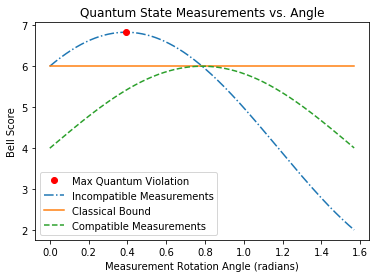

In [5]:
bb84_incomp_plt, = plt.plot(θ_series, bb84_incompatible_scores, label='Incomp Measurment', linestyle='-.')
cl_bound_plt, = plt.plot(θ_series, classical_bound, label='Classical Bound')

max_violation, = plt.plot(np.pi/8,6.828,'ro', label="Max Quantum Violation")
bb84_comp_plt, = plt.plot(θ_series, bb84_compatible_scores, label="Comp Measurement", linestyle='--')

plt.legend(
    [max_violation, bb84_incomp_plt, cl_bound_plt, bb84_comp_plt],
    ['Max Quantum Violation','Incompatible Measurements', 'Classical Bound', 'Compatible Measurements'])

plt.xlabel("Measurement Rotation Angle (radians)")
plt.ylabel("Bell Score")
plt.title("Quantum State Measurements vs. Angle");

## No Violation Occurs for Classical States

We now discuss the below plot for measurements on classical states used in this protocol.

* The `Incompatible Measurements` plot shows that if classical states are used, Bob cannot create a violation using incompatible mesurments.
* The `Compatible Measurments` plot shows that if classical states are used, Bob cannot create a violation using compatible measurements.

The conclusion is that classical states cannot be used to violate with or without measurement incompatibility.

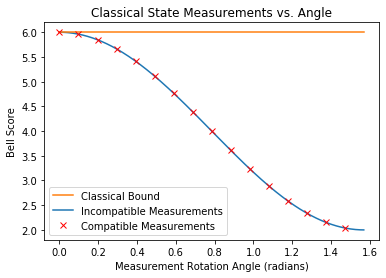

In [6]:
# plot of quantum violation if classical measurements are used or classical states

cl_incomp_plt, = plt.plot(θ_series, cl_incompatible_scores, label="cl incomp", )
cl_bound_plt, = plt.plot(θ_series, classical_bound, label='Classical Bound')
cl_comp_plt, = plt.plot(θ_series[::64], cl_compatible_scores[::64], 'rx', label="cl comp")

plt.legend(
    [cl_bound_plt, cl_incomp_plt, cl_comp_plt],
    ['Classical Bound', 'Incompatible Measurements', 'Compatible Measurements'])

plt.xlabel("Measurement Rotation Angle (radians)")
plt.ylabel("Bell Score")
plt.title("Classical State Measurements vs. Angle");
